In [ ]:
# Installing language detection library 
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 3.2 MB/s 
  Using cached pybind11-2.10.0-py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3162529 sha256=0bb1d6f13e3f419e29205a8854228cbaa2182ce95aa9afafc12301702cf36d6f
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
!wget -O /tmp/lid.176.bin https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin

--2022-07-24 10:38:35--  https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 104.22.75.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131266198 (125M) [application/octet-stream]
Saving to: ‘/tmp/lid.176.bin’

/tmp/lid.176.bin    100%[===================>] 125.18M  47.4MB/s    in 2.6s    

2022-07-24 10:38:38 (47.4 MB/s) - ‘/tmp/lid.176.bin’ saved [131266198/131266198]



#### Google Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Import libraries and extract data from Zip file.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from zipfile import ZipFile
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

file_name = '/content/drive/MyDrive/Colab Notebooks/Capstone_Proj_Cha/archive.zip'
# file_name= '/content/drive/MyDrive/ML_DeepLearning/NNDataSetGreatLearning/NLP/Capstone/archive/'

with ZipFile(file_name, 'r') as zip:
    zip.printdir()
    zip.extractall()


# Load data into Dataframe
# data = pd.read_csv(file_name+'IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv',index_col=[0])
data = pd.read_csv('IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv',index_col=[0])

File Name                                             Modified             Size
Accidents_Storyline_example.png                2019-09-29 03:11:32       109296
IHMStefanini_industrial_safety_and_health_database.csv 2019-09-29 03:11:34        35695
IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv 2019-09-29 03:11:34       193631


#### Shape of the data

In [ ]:
print("Shape of the data is ",data.shape)
print("Printing first five rows ..")
data.head()

Shape of the data is  (418, 10)
Printing first five rows ..


,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


#### Exploring the Data

In [ ]:
# Print Column names of dataframe data 
data.columns

Index(['Data', 'Countries', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Genre', 'Employee or Third Party',
       'Critical Risk', 'Description'],
      dtype='object')

In [ ]:
# Print Column Information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 438
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Data                      418 non-null    object
 1   Countries                 418 non-null    object
 2   Local                     418 non-null    object
 3   Industry Sector           418 non-null    object
 4   Accident Level            418 non-null    object
 5   Potential Accident Level  418 non-null    object
 6   Genre                     418 non-null    object
 7   Employee or Third Party   418 non-null    object
 8   Critical Risk             418 non-null    object
 9   Description               418 non-null    object
dtypes: object(10)
memory usage: 35.9+ KB


In [ ]:
# Printing one row of the data
data.iloc[399]

Data                                                      2017-06-11 00:00:00
Countries                                                          Country_01
Local                                                                Local_01
Industry Sector                                                        Mining
Accident Level                                                              I
Potential Accident Level                                                   IV
Genre                                                                    Male
Employee or Third Party                                           Third Party
Critical Risk                                                          Others
Description                 In circumstances that the driver of the plate ...
Name: 420, dtype: object

In [ ]:
# Column 'Description' of 399th record
data.Description[399]

'Employee was engaged in adjusting metallic shapes using a tether, and striking the shape, the tether cable hit the lifeline, projecting its hand into the metal structure of the shape, causing a superficial injury to the ring finger of the right hand.'

In [ ]:
# Check Unique values from each column other than Date and Description
columns = data.columns[1:-1]
for col in columns[1:-1]: 
  print("col is ",col," unique values:\n",data[col].unique())
  print("\n")

col is  Local  unique values:
 ['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']


col is  Industry Sector  unique values:
 ['Mining' 'Metals' 'Others']


col is  Accident Level  unique values:
 ['I' 'IV' 'III' 'II' 'V']


col is  Potential Accident Level  unique values:
 ['IV' 'III' 'I' 'II' 'V' 'VI']


col is  Genre  unique values:
 ['Male' 'Female']


col is  Employee or Third Party  unique values:
 ['Third Party' 'Employee' 'Third Party (Remote)']




In [ ]:
# Data description for Categorical columns
data.drop(columns='Description').describe(exclude=[np.number]).T

,count,unique,top,freq
Data,418,287,2017-02-08 00:00:00,6
Countries,418,3,Country_01,248
Local,418,12,Local_03,89
Industry Sector,418,3,Mining,237
Accident Level,418,5,I,309
Potential Accident Level,418,6,IV,141
Genre,418,2,Male,396
Employee or Third Party,418,3,Third Party,185
Critical Risk,418,33,Others,229


#### Observations:

1. The given file has 425 rows and 10 Columns
2. The Collected data is from 3 different countries and 12 Local areas
3. The Accidents data are categorised into 3 differnt industry type into Metal, Mining and others
4. Column 'Critical Risk' gives a brief insight of cause of the accident
5. Accident Severity is categorised to I being lowest & IV being highest
6. Potential Accident Severity is categorised to I being lowest & VI being highest
7. Employee types are both Internal and Third Party 
8. Both Male and Female employees work across different industry and are prone to casuality

### Data Cleaning and Processing

#### Check for Null Values if any

In [ ]:
# Check for Null Values if any
data.isnull().any()

Data                        False
Countries                   False
Local                       False
Industry Sector             False
Accident Level              False
Potential Accident Level    False
Genre                       False
Employee or Third Party     False
Critical Risk               False
Description                 False
dtype: bool

#### Check for Duplicates

In [ ]:
# Check for Duplicates
print(data.duplicated().sum())
# Remove duplictes
data.drop_duplicates(inplace=True)
# Verify
print(data.duplicated().sum())

0
0


#### Check if the description is english

In [ ]:
# Check for language of the description, if any other than English, print those rows and get the count
import fasttext
pre_model = '/tmp/lid.176.bin'
model = fasttext.load_model(pre_model)

count = 0
langs = []
for i, col in enumerate(data):
  if col == 'Description':
    for j in data[col]:
      lang = model.predict(j)[0]
      a = str(lang)[11:13]
      if a != 'en':
        count += 1
        print(data.iloc[i])
print(count)

0


#### Rename Columns

In [ ]:
data.rename(columns={'Data':'Date', 'Countries':'Country', 'Industry Sector':'Industry', 'Accident Level': 'Accident_Severity', 'Potential Accident Level': 'Potential_Accident_Severity', 'Genre':'Gender', 'Employee or Third Party':'Employee_or_Third_Party','Critical Risk': 'Critical_Risk'}, inplace=True)
#verify
data.head(2)

,Date,Country,Local,Industry,Accident_Severity,Potential_Accident_Severity,Gender,Employee_or_Third_Party,Critical_Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...


Introduce Custom Columns

In [ ]:
data["Year"]= data["Date"].apply(lambda x : x.split("-")[0])
data["Month"]= data["Date"].apply(lambda x: x.split("-")[1])
data.head()

,Date,Country,Local,Industry,Accident_Severity,Potential_Accident_Severity,Gender,Employee_or_Third_Party,Critical_Risk,Description,Year,Month
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,01
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,01
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,01
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,01
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,01


#### Clean the Text Data

Import and download necessary corpa

In [ ]:
import nltk
import re
import random
from random import sample
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

random.seed(6)

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

stop_words = stopwords.words('english')
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


Find row with max words in Description column

In [ ]:
words = data['Description'].str.split("\\s+")
max_word_sent = words.str.len().max()
indx = words.str.len().idxmax()

print("maximum words in a sentence is :", max_word_sent)
row=indx
display(data.loc[row:row])

maximum words in a sentence is : 183


,Date,Country,Local,Industry,Accident_Severity,Potential_Accident_Severity,Gender,Employee_or_Third_Party,Critical_Risk,Description,Year,Month
91,2016-03-24 00:00:00,Country_03,Local_10,Others,IV,IV,Male,Third Party,Poll,"When performing the sleeve removal maneuver, w...",2016,03


Printing most common occurance of words

In [ ]:
from collections import Counter
text = " ".join(str(w) for w in data['Description'])
words= text.split(" ")
counter_obj = Counter(words)
counter_obj.most_common(n=15)

[('the', 4072),
 ('of', 1489),
 ('to', 662),
 ('and', 586),
 ('a', 498),
 ('in', 457),
 ('was', 425),
 ('that', 285),
 ('on', 276),
 ('with', 254),
 ('his', 248),
 ('at', 207),
 ('when', 194),
 ('The', 177),
 ('causing', 166)]

Define Functions 

In [ ]:
def clean_description(text):
    # lower case
    text= text.lower()
    # keep only alphabet
    text = re.sub('[^a-z ]','',text)
    # tokenize the text
    tokens = word_tokenize(text)
    # lemmatize 
    tokens = [wordnet_lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

def remove_stopwords(text,stop_words=stopwords.words('english')):
    words = text.split(" ")
    #remove stopwords 
    words = [word for word in words if word not in stop_words]
    return " ".join(words)


In [ ]:
data["Description"] = data["Description"].apply(clean_description)

Word Cloud on data without removing stopwords

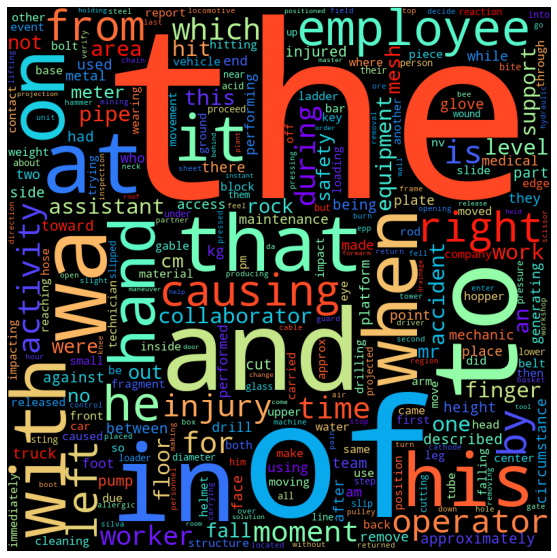

In [ ]:
from wordcloud import WordCloud 
text = " ".join(str(w) for w in data['Description'])


word_cloud = WordCloud(stopwords = [], width = 800, height = 800, random_state=3, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=300, collocations=False).generate_from_text(text)
plt.figure(figsize=(15,10))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

word Cloud after removing stopwords

In [ ]:
data["Description"] = data["Description"].apply(remove_stopwords)

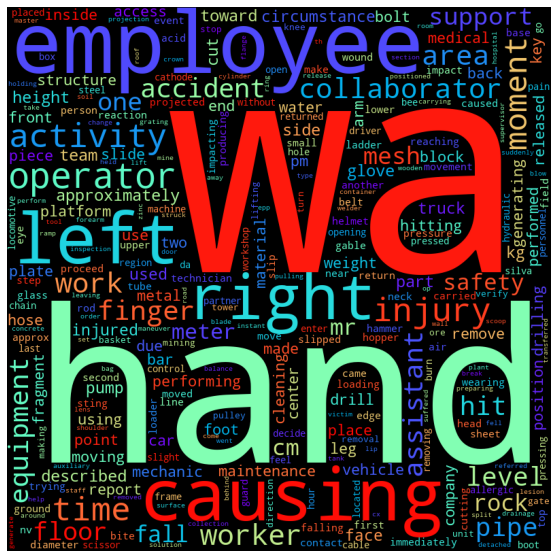

In [ ]:
from wordcloud import WordCloud
text = " ".join(str(w) for w in data['Description'])

word_cloud = WordCloud(width = 800, height = 800, random_state=0, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=300, collocations=False).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

Identifying two letter words in the Description

In [ ]:
def char_two(text):
  words = text.split(" ")
  words = [word for word in words if (len(word) <= 2 and word not in ' ')]
  return " ".join(words)

In [ ]:
charc = data["Description"].apply(char_two)

In [ ]:
print(charc)

0                    
1            wa wa wa
2                  wa
3      nv cx ob wa mr
4         cm cm kg wa
            ...      
434                hq
435                  
436                wa
437                nd
438                 e
Name: Description, Length: 418, dtype: object


In [ ]:
two_char = []
for i in charc:
  split_i = i.split()
  for j in split_i:
    if j not in two_char:
      two_char.append(j)

print("No of two or less characters words:", len(two_char), two_char)

No of two or less characters words: 80 ['wa', 'nv', 'cx', 'ob', 'mr', 'cm', 'kg', 'pm', 'hm', 'g', 'ml', 'go', 'v', 'fi', 'rp', 'hq', 'ha', 'r', 'tm', 'n', 'tn', 'gr', 'bp', 'de', 'la', 'nd', 'mt', 'iv', 'op', 'mc', 'zn', 'x', 'h', 'da', 'th', 'bo', 'rb', 'mx', 'l', 'f', 'us', 'st', 'nq', 'ex', 'el', 'lt', 'pb', 'tk', 'sr', 'ft', 'km', 'sf', 'b', 'br', 'rd', 'dd', 'tc', 'ee', 'hr', 'xx', 'c', 'ce', 'er', 'ii', 'tq', 'e', 'mv', 'lm', 'ax', 'lb', 'fm', 'z', 'sa', 'kv', 'ip', 'hw', 'fz', 'ja', 'wk', 'tj']


Removing two or less letter words from Description

In [ ]:
data["Description"] = data["Description"].apply(lambda text: remove_stopwords(text, two_char))

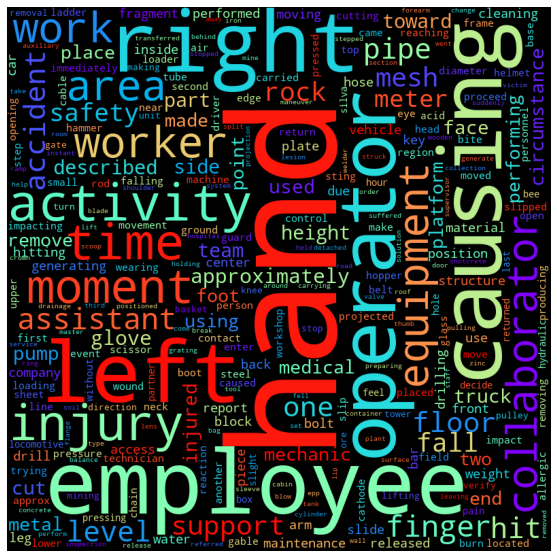

In [ ]:
from wordcloud import WordCloud
text = " ".join(str(w) for w in data['Description'])

word_cloud = WordCloud(width = 800, height = 800, random_state=0, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=300, collocations=False).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

Most common occurance of words after stopwords removal

In [ ]:
from collections import Counter
text = " ".join(str(w) for w in data['Description'])
words= text.split(" ")
counter_obj = Counter(words)
counter_obj.most_common(n=15)

[('hand', 177),
 ('employee', 172),
 ('causing', 166),
 ('left', 155),
 ('right', 154),
 ('operator', 132),
 ('activity', 117),
 ('time', 112),
 ('injury', 110),
 ('moment', 101),
 ('worker', 84),
 ('collaborator', 81),
 ('area', 80),
 ('work', 79),
 ('equipment', 77)]

### EDA(Data Analysis and Preparation)

#### -- Univariate Anaysis 



Find the number of words per each description

In [ ]:
data['des_len'] = data['Description'].apply(lambda x: len(x.split(" ")))

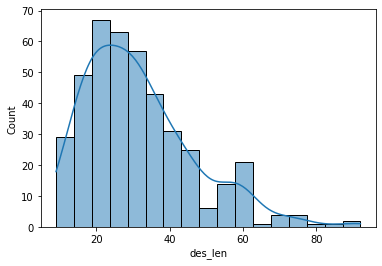

In [ ]:
# find number of words used per description for all the entries
sns.histplot(x=data['des_len'],kde=True)

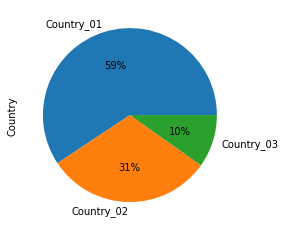

In [ ]:
# Accident % for each of 3 Countries as per given Data
Country = data['Country'].value_counts(normalize= True)*100
Country.plot(kind ='pie', autopct = '%.0f%%');

Observations: 
*   Country_01 reports approx 60% of accidents
*   Country_02 reports 30% of accidents





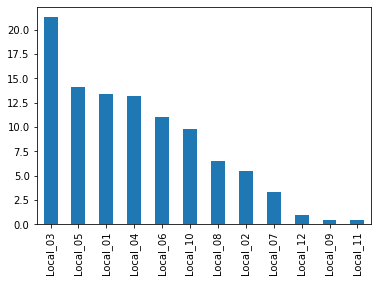

In [ ]:
# Accident % for each of 12 Local as per given Data
Local = data['Local'].value_counts(normalize=True)*100
Local.plot(kind='bar');

Observations:
*   Local_03 reports 20% of accidents



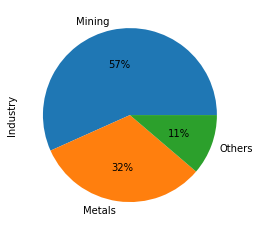

In [ ]:
# Accident % for each of 3 Industries as per given Data
Industry = data['Industry'].value_counts(normalize=True)*100
Industry.plot(kind='pie',autopct = '%.0f%%');

Observations:

*   Mining Industry is the highest accident prone industry with 57% accidents
*   Metal Industry is the 2nd highest with 32% of accidents







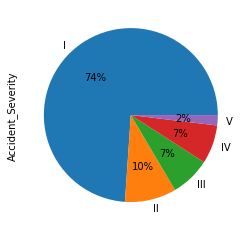

In [ ]:
# Accident Severity in % from given Data
Acc_Severe = data['Accident_Severity'].value_counts(normalize=True)*100
Acc_Severe.plot(kind='pie',autopct = '%.0f%%');

Observations:
*   Lowest Severity (I) accidents are high in occurance, reporting 74%




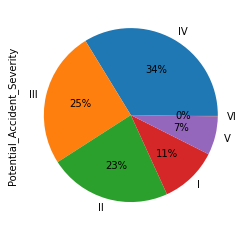

In [ ]:
#  % of Potential Accident Severity from per given Data
Poten_Acc_Severe = data['Potential_Accident_Severity'].value_counts(normalize=True)*100
Poten_Acc_Severe.plot(kind='pie', autopct = '%.0f%%');

Observations:
*   Potential Severity II, III, IV could be higher in occurance, amounting to 80%



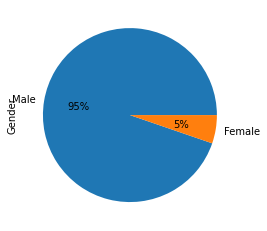

In [ ]:
# % of Male and Female prone to accidents from given Data
Gender = data['Gender'].value_counts(normalize=True)*100
Gender.plot(kind='pie', autopct = '%.0f%%');

Observations:
*   Male Employees are are prone to high accidents with 95%




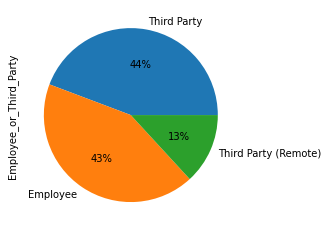

In [ ]:
# % of Employee or Third party prone to accidents from given Data
Emp_Thirdprty = data['Employee_or_Third_Party'].value_counts(normalize=True)*100
Emp_Thirdprty.plot(kind='pie', autopct = '%.0f%%');

Observations:

*   Third Party type of employees are more prone to accidents with 57%
*   Employees are prone to accidents with 43% 













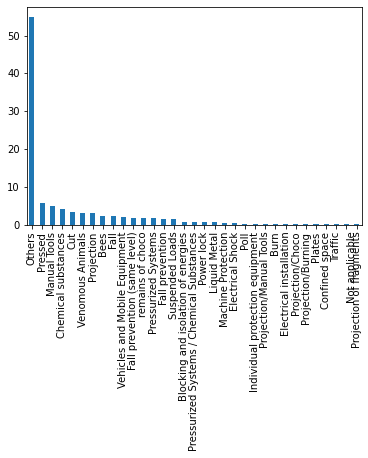

In [ ]:
# Critical Risk % occurance from given Data
Critical_Risk = data['Critical_Risk'].value_counts(normalize=True)*100
Critical_Risk.plot(kind='bar');

Observations:
*   Critical Risk with others category having 50% of accident occurance 



#### -- Bivariate Analysis

Distribution of Accident Level per each month

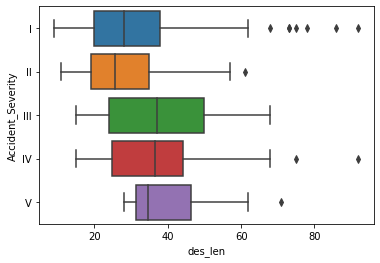

In [ ]:
sns.boxplot(y='Accident_Severity',x='des_len',data=data, order=['I','II','III','IV','V']);

Observations


*   Most of the data collected for Accident Leve I falls under IQR, but also outliers are present compared to other accident level
*   Accident Level I, II, IV and V are right skewed
*   Accident Level III and IV tend to have longer Descriptions followed by V, I and II






Distribution of Industry Country wise


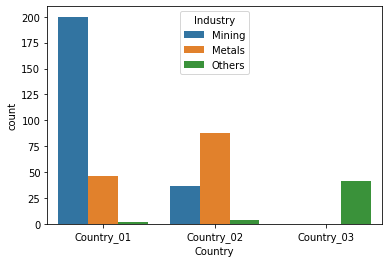

In [ ]:
sns.countplot(data=data, x='Country', hue='Industry');

Observations:
*   Country_01 has high number of industries
*   Mining Industry is high in number in Country_01, Metal Industry is high in number in Country_02, Country_03 has Industry other than Mining and Metal high in number



Distribution of Industry Local wise

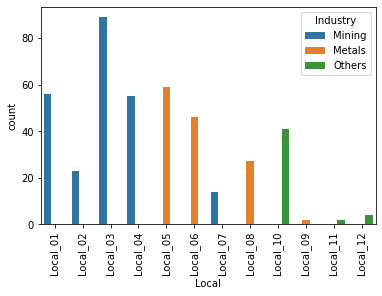

In [ ]:
plt.xticks(rotation=90)
sns.countplot(data=data, x='Local', hue='Industry');

Observations:
*   Local_03 has highest Mining Industry
*   Male Employees are more in Mining, Metal and other Industry
*   Male employees are high as Third party employees





Distribution of Industry Gender wise

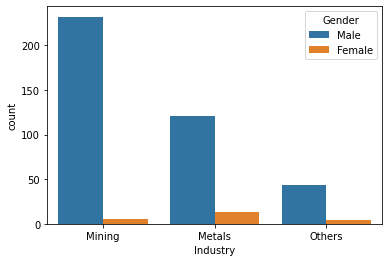

In [ ]:
sns.countplot(data=data, x='Industry', hue='Gender');

Observations:
*   Males are more prone to accidents of all severety, and Mining Industry with severety I




Distribution of Emp or Third party Gender wise

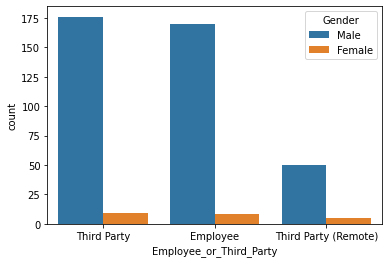

In [ ]:
sns.countplot(data=data, x='Employee_or_Third_Party', hue='Gender')

Observations:
*   Third party employees are more prone to all levels of accident severety,
*   Employee are prone to Severety I accidents than Third Party



Distribution of Accident Levels Industry wise

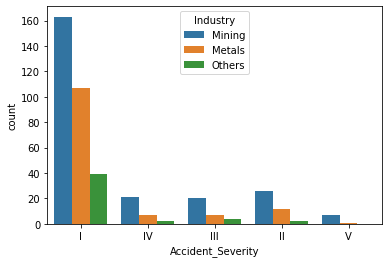

In [ ]:
sns.countplot(data=data, x='Accident_Severity', hue= 'Industry');

Observations:
*   Severety I accidents are high in all three Industry types




Distribution of Potential Accident Levels Industry wise

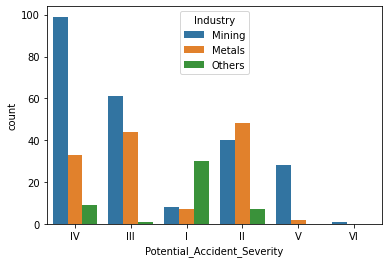

In [ ]:
sns.countplot(data=data, x='Potential_Accident_Severity', hue='Industry');

Observations:
*   Mining Industry seems to have Potential Severity types from I thru VI, Severity II and III could be more in metal Industry, Severety I could be more in Other industry




Distribution of Potential Accident Levels Gender wise

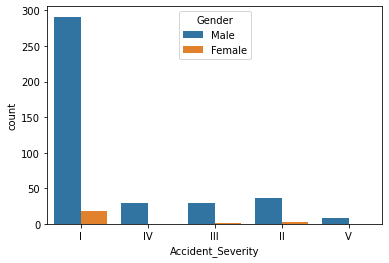

In [ ]:
sns.countplot(data=data, x='Accident_Severity', hue='Gender');

Observations:
*   Males are more prone to accidents of all severety, and Mining Industry with severety I



Distribution of Accident Levels Employee or Third_Party wise

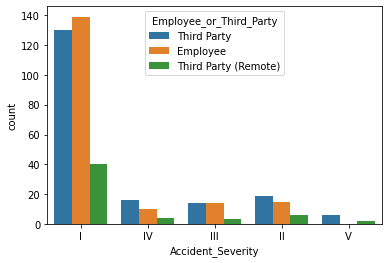

In [ ]:
sns.countplot(data=data, x='Accident_Severity', hue='Employee_or_Third_Party');

Observations:
*   Third party employees are more prone to all levels of accident severety
*   Employee are prone to Severety I accidents than Third Party





Distribution of Accident Levels Critical Risk wise

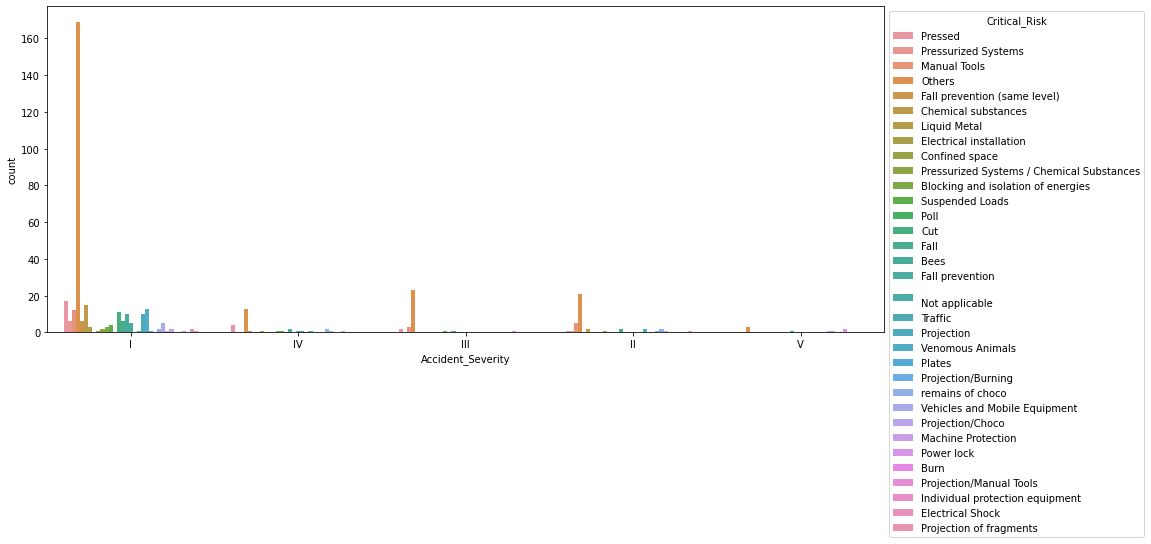

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6

Gen_Acc_plt = sns.countplot(data=data, x='Accident_Severity', hue='Critical_Risk')
Gen_Acc_plt.legend(title='Critical_Risk', bbox_to_anchor=(1,1), loc='upper left');

Observations:
*   Accidents due to other critical risk is high  

Distribution of Accident Levels Potential Accident Levels wise

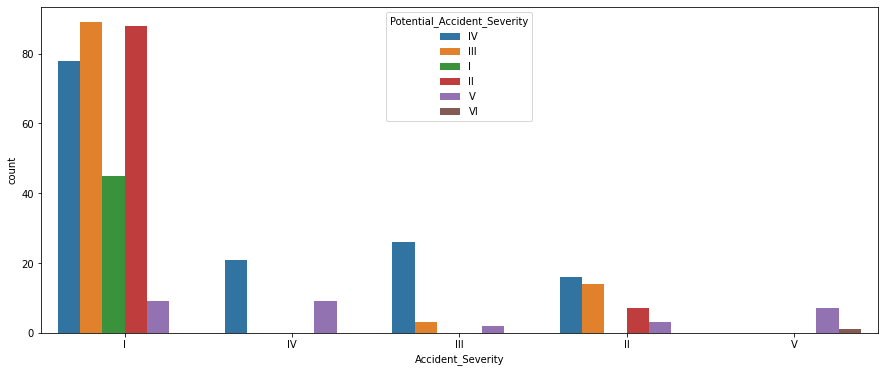

In [ ]:
sns.countplot(data=data, x='Accident_Severity', hue='Potential_Accident_Severity');

Observations: Grouping of Accident with Potential Accident level

Accident Level ----- Potential Accident Level

	I		   ------ I, II, III, IV, V
			
	II		  ------ II, III, IV, V

	III		 ------ III, IV, V

	IV		  ------ IV, V

	V		   ------ V, VI



Rename rows of Third party(Remote) type into Third Party 

### Data PreProcessing After EDA Observations

#### Convert ThirdParty(Remote) to Third Party

In [ ]:
data["Employee_or_Third_Party"]= data["Employee_or_Third_Party"].apply(lambda x : x if x!= 'Third Party (Remote)' else 'Third Party')
data["Employee_or_Third_Party"].value_counts()

Third Party    240
Employee       178
Name: Employee_or_Third_Party, dtype: int64

#### Drop unnecessary columns

In [ ]:
cols=['Date','Gender', 'Year', 'Month', 'des_len']
data.drop(cols, axis=1,inplace=True)

#verify the columns now
data.columns

Index(['Country', 'Local', 'Industry', 'Accident_Severity',
       'Potential_Accident_Severity', 'Employee_or_Third_Party',
       'Critical_Risk', 'Description'],
      dtype='object')

#### Create a contatenated column for NLP

In [ ]:
columns = list(data.columns)
columns.remove('Accident_Severity') # we dont need this column as this is the target 
data["final_description"]=data[columns].apply(" ".join,axis=1)

#drop others columns
data.drop(columns,axis=1, inplace=True)

#### Pickle the final data

In [ ]:
data.to_pickle("./final_data.pkl")

In [ ]:
import pickle

data1 = pickle.load(open('/content/final_data.pkl', "rb"))

In [ ]:
data.shape

(418, 2)

In [ ]:
#importing Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer

 Creating TFIDF Features

In [ ]:

tfidf_df = pd.DataFrame()
for i in [1,2,3]:
    vec_tfidf = TfidfVectorizer(max_features=100, norm='l2', stop_words='english', lowercase=True, use_idf=True, ngram_range=(i,i))
    X = vec_tfidf.fit_transform(data['final_description']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in vec_tfidf.get_feature_names()])
    tfidf_df = pd.concat([tfidf_df.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)

tfidf_df.head(3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,TFIDF_access,TFIDF_accident,TFIDF_activity,TFIDF_approximately,TFIDF_area,TFIDF_arm,TFIDF_assistant,TFIDF_bar,TFIDF_bolt,TFIDF_car,...,TFIDF_party vehicles mobile,TFIDF_party venomous animals,TFIDF_returned normal activity,TFIDF_right hand causing,TFIDF_substances employee report,TFIDF_time accident employee,TFIDF_time accident worker,TFIDF_used safety glass,TFIDF_vehicles mobile equipment,TFIDF_worker wearing safety
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.608531,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.398982,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.204499,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
encoded_df = pd.DataFrame()
#Label Encoding
encoded_df['Accident_Severity'] = LabelEncoder().fit_transform(data['Accident_Severity']).astype(np.int8)
final_df =  encoded_df.join(tfidf_df.reset_index(drop=True))

In [ ]:
#Splitting X,Y Variables
X = final_df.drop(['Accident_Severity'], axis = 1) # Considering all Predictors
y = final_df['Accident_Severity']

In [ ]:
final_df['Accident_Severity'].value_counts()

0    309
1     40
2     31
3     30
4      8
Name: Accident_Severity, dtype: int64

In [ ]:
#Splitting of Train & Test Variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1, stratify = y)

In [ ]:
#Printing the shape OF train & Test Variables
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (334,300)
y_train shape : (334,)
X_test shape : (84,300)
y_test shape : (84,)


In [ ]:
#Function of creating the Train & Test Model based on the Required Model
def train_test_model(model, method, X_train, X_test, y_train, y_test, of_type, index, scale, report, save_model):
    
    if report == "yes":
        print (model)
        print ("***************************************************************************")

        model.fit(X_train, y_train) # Fit the model on Training set

    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
    
    if of_type == "coef":
        # Intercept and Coefficients
        print("The intercept for our model is {}".format(model.intercept_), "\n")
        
        for idx, col_name in enumerate(X_train.columns):
            print("The coefficient for {} is {}".format(col_name, model.coef_.ravel()[idx]))

    y_pred = model.predict(X_test) # Predict on Test set

    y_predictions = model.predict_proba(X_test)

    train_accuracy_score = model.score(X_train, y_train)
    test_accuracy_score = model.score(X_test, y_test)

    precision_score = precision_score(y_test, y_pred, average='weighted')
    recall_score = recall_score(y_test, y_pred, average='weighted')
    f1_score = f1_score(y_test, y_pred, average='weighted')

  
    if report == "yes":
      # Model - Confusion matrix
        model_cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(model_cm, annot=True,  fmt='.2f', xticklabels = ["I", "II", "III", "IV", "V"] , yticklabels = ["I", "II", "III", "IV", "V"] )
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()

      # Model - Classification report
        model_cr = classification_report(y_test, y_pred)
        print(model_cr)

    # Store the accuracy results for each model in a dataframe for final comparison
    resultsDf = pd.DataFrame({'Method': method, 'Train Accuracy': train_accuracy_score, 'Test Accuracy': test_accuracy_score, 
                              'Precision': precision_score, 'Recall': recall_score, 'F1-Score': f1_score, 
                              }, index=[index])
    
    # Save the model
    if save_model == "yes":
        filename = 'finalised_model.sav'
        pickle.dump(model, open(filename, 'wb'))
      
    return resultsDf  # return all the metrics along with predictions

Decision Tree - Random Forest Classifier



RandomForestClassifier(n_estimators=10, random_state=1)
***************************************************************************


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


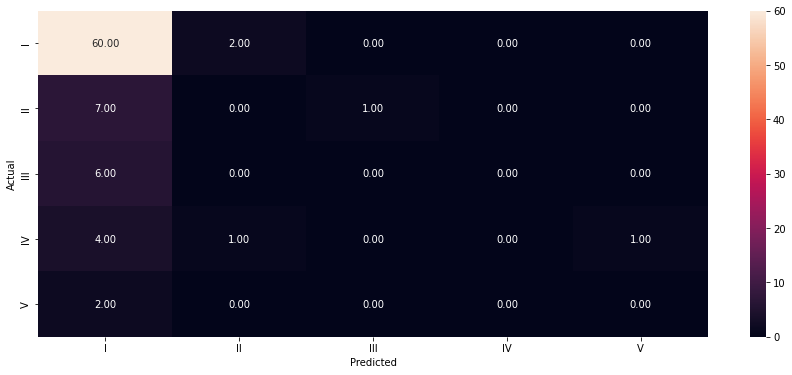

              precision    recall  f1-score   support

           0       0.76      0.97      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.71        84
   macro avg       0.15      0.19      0.17        84
weighted avg       0.56      0.71      0.63        84



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score
1,Random Forest with original data,0.982036,0.714286,0.560579,0.714286,0.628166


In [ ]:
# Building a Random Forest Classifier on Training set
rfc_model = RandomForestClassifier(n_estimators=10, random_state=1)

# Train and Test the model
rf_df = train_test_model(rfc_model, 'Random Forest with original data', X_train, X_test, y_train, y_test, 'none', 1, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
#resultsDf = pd.concat([resultsDf,rf_df])
#resultsDf
rf_df

Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


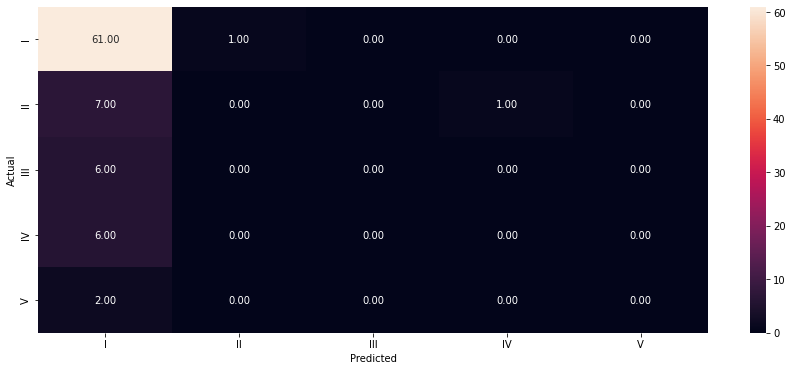

              precision    recall  f1-score   support

           0       0.74      0.98      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.73        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.55      0.73      0.63        84



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score
2,Logistic Regression without Sampling,0.847305,0.72619,0.549071,0.72619,0.625331


In [ ]:
resultsDf = pd.DataFrame()

# Building a Linear Regression model
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
                                                     
# Train and Test the model
resultsDf = train_test_model(lr, 'Logistic Regression without Sampling', X_train, X_test, y_train, y_test, 'none', 2, 'no', 'yes', 'no')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf

In [ ]:
#importing Required Libraries
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import optimizers
from keras.models import Model, Sequential
from tensorflow.keras.layers import  Activation, Dense

In [ ]:
# define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_initializer='random_normal'))
model.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(256, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(40, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(1, activation='linear'))

# compile the nn model
model.compile(loss='mse', optimizer=SGD(lr=0.001, momentum=0.9), metrics=['accuracy'])

# fitting the nn model on the dataset
training_history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, validation_data=(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
42/42 [==============================] - 3s 45ms/step - loss: 1.1699 - accuracy: 0.7395 - val_loss: 1.1105 - val_accuracy: 0.7381
Epoch 2/100
42/42 [==============================] - 1s 13ms/step - loss: 1.0432 - accuracy: 0.3832 - val_loss: 1.1032 - val_accuracy: 0.0952
Epoch 3/100
42/42 [==============================] - 0s 11ms/step - loss: 1.0445 - accuracy: 0.3533 - val_loss: 1.1029 - val_accuracy: 0.0952
Epoch 4/100
42/42 [==============================] - 1s 13ms/step - loss: 1.0430 - accuracy: 0.0958 - val_loss: 1.1026 - val_accuracy: 0.0952
Epoch 5/100
42/42 [==============================] - 0s 10ms/step - loss: 1.0463 - accuracy: 0.4551 - val_loss: 1.1030 - val_accuracy: 0.1190
Epoch 6/100
42/42 [==============================] - 0s 10ms/step - loss: 1.0402 - accuracy: 0.0958 - val_loss: 1.1016 - val_accuracy: 0.0952
Epoch 7/100
42/42 [==============================] - 0s 11ms/step - loss: 1.0406 - accuracy: 0.2246 - val_loss: 1.1010 - val_accuracy: 0.0952
Epoch 

In [ ]:
#To check model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                19264     
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 40)                10280     
                                                                 
 dense_4 (Dense)             (None, 1)                 41        
                                                                 
Total params: 70,929
Trainable params: 70,929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# To evaluate the  model
_,accuracy = model.evaluate(X_test, y_test, batch_size=8, verbose=0)
print('Test accuracy of the model: %.2f' % (accuracy*100))

Test accuracy of the model: 57.14


NLP Preprocessing

Importing Necessary Files

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Input, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

path = '/content/drive/MyDrive/Colab Notebooks/Capstone_Proj_Cha/'
glove_file = datapath(path + 'glove.6B.50d.txt')
tmp_file = get_tmpfile(path + 'word2vec.glove.6B.50d.txt')
glove2word2vec(glove_file, tmp_file)


(400000, 50)

In [ ]:
import pickle
data1 = pickle.load(open('/content/final_data.pkl', "rb"))

In [ ]:
data1.shape

(418, 2)

Splitting Data into X and y

In [ ]:
X = data1['final_description']
y = data1['Accident_Severity']

Encoding the Target column values using LabelEncoder

In [ ]:
y = LabelEncoder().fit_transform(y)

Splitting data into train and test data with 20% split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1, stratify= y)

Printing the shape of test and train data

In [ ]:
print('X_train:',X_train.shape[0],',', 'X_test:',X_test.shape[0],',', 'y_train:',y_train.shape[0],',', 'y_test:',y_test.shape[0])

X_train: 334 , X_test: 84 , y_train: 334 , y_test: 84


Encoding using One-hot-Encoder

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

Tokenizing the final_description column and converting to sequence of values

In [ ]:
tokens = Tokenizer(num_words = 5000)
tokens.fit_on_texts(X_train)

X_train = tokens.texts_to_sequences(X_train)
X_test = tokens.texts_to_sequences(X_test)

Padding the variable length description into max length

In [ ]:
vocab_size = len(tokens.word_index) +1
print(vocab_size)

max_len = 107

X_train = pad_sequences(X_train, padding= 'post',maxlen = max_len)
X_test = pad_sequences(X_test, padding = 'post', maxlen = max_len)

2509


Using the golbal vocabulary for training purpose

In [ ]:
embed_size = 50
embed_dict = {}

word2vec = open('/content/drive/MyDrive/Colab Notebooks/Capstone_Proj_Cha/word2vec.glove.6B.50d.txt')

for line in word2vec:
  rec = line.split()
  word = rec[0]
  vec_dim = np.asarray(rec[1:], dtype='float32')
  embed_dict[word] = vec_dim

word2vec.close

embed_matrix = np.zeros((vocab_size, embed_size))

for word, index in tokens.word_index.items():
  embed_vec = embed_dict.get(word)
  if embed_vec is not None:
    embed_matrix[index] = embed_vec

Building basic LSTM Model, output as softmax

In [ ]:
input = Input(shape=(max_len,))
model = Embedding(vocab_size, embed_size, weights=[embed_matrix], trainable=False)(input)
model = Bidirectional(LSTM(128, return_sequences = True))(model)
model = GlobalMaxPool1D()(model)
model = Dropout(0.1, input_shape=(256,))(model)
out = Dense(5, activation="softmax")(model)

In [ ]:
model = Model(input, out)

Compiling model using categorical_crossentropy loss

In [ ]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

Print Model Summary

In [ ]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 107)]             0         
                                                                 
 embedding (Embedding)       (None, 107, 50)           125450    
                                                                 
 bidirectional (Bidirectiona  (None, 107, 256)         183296    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 5)                 1285  

Train Model

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1, verbose=1)

Epoch 1/10
10/10 [==============================] - 8s 335ms/step - loss: 1.0268 - accuracy: 0.6900 - val_loss: 1.2984 - val_accuracy: 0.7059
Epoch 2/10
10/10 [==============================] - 2s 210ms/step - loss: 0.9046 - accuracy: 0.7433 - val_loss: 1.0473 - val_accuracy: 0.7059
Epoch 3/10
10/10 [==============================] - 2s 203ms/step - loss: 0.8597 - accuracy: 0.7433 - val_loss: 1.1125 - val_accuracy: 0.7059
Epoch 4/10
10/10 [==============================] - 2s 201ms/step - loss: 0.8202 - accuracy: 0.7433 - val_loss: 1.0491 - val_accuracy: 0.7059
Epoch 5/10
10/10 [==============================] - 2s 209ms/step - loss: 0.7853 - accuracy: 0.7433 - val_loss: 1.0464 - val_accuracy: 0.7059
Epoch 6/10
10/10 [==============================] - 2s 204ms/step - loss: 0.7468 - accuracy: 0.7433 - val_loss: 1.1119 - val_accuracy: 0.7059
Epoch 7/10
10/10 [==============================] - 2s 207ms/step - loss: 0.7083 - accuracy: 0.7467 - val_loss: 1.1108 - val_accuracy: 0.7059
Epoch 

Evaluate model and print Train and Test Accuracy

In [ ]:
train_acc = model.evaluate(X_train, y_train, batch_size=8, verbose=0)
test_acc = model.evaluate(X_test, y_test, batch_size=8,verbose=0)

print("Training_Accuracy:", train_acc[1]*100)
print("Testing_Accuracy:", test_acc[1]*100)

Training_Accuracy: 77.2455096244812
Testing_Accuracy: 73.8095223903656
